In [83]:
%pip install pandas numpy scipy matplotlib scikit-learn



   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 812.7 kB/s eta 0:00:13
    --------------------------------------- 0.3/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/10.6 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 4.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.6 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 6.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.6 MB 7.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.6 MB 7.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.6 MB 7.9 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 8.4 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.6 MB 8.4 MB/s eta 0:00:01
   -------

In [27]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [68]:
search_data = pd.read_csv('search_data.csv')


In [101]:
def general_exp_func(x, a, base, b):
    return a * base**x + b

params_general, params_covariance_general = curve_fit(
    general_exp_func, search_data['depth'], search_data['search_time'], p0=[1, 6, 0.001]
)


In [102]:
from sklearn.metrics import r2_score

predicted = general_exp_func(search_data['depth'], *params_general)

r2 = r2_score(search_data['search_time'], predicted)
print(f"R^2 from sklearn: {r2}")


R^2 from sklearn: 0.9910997747252162


[ 263.7618697   592.83307062 1332.35823476 2994.30089901 6729.202094  ]


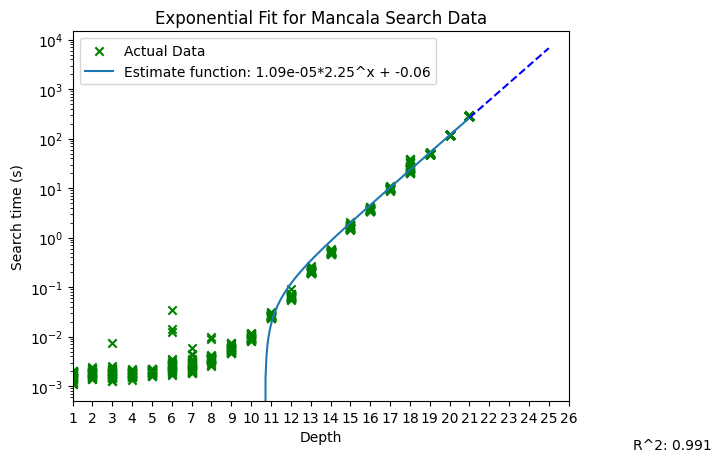

In [103]:

plt.scatter(search_data['depth'], search_data['search_time'], label='Actual Data', marker='x', c='green')
x_model_general= np.linspace(min(search_data['depth']), max(search_data['depth']), 400)
y_model_general = general_exp_func(x_model_general, *params_general)

x_extrapolate = np.array([21, 22, 23, 24, 25])
y_extrapolate = general_exp_func(x_extrapolate, *params_general)
print(y_extrapolate)


plt.plot(x_model_general, y_model_general, label='Estimate function: {:.2e}*{:.2f}^x + {:.2f}'.format(params_general[0], params_general[1], params_general[2]))

plt.plot(x_extrapolate, y_extrapolate, 'b--')
plt.xticks(range(1, 27))
plt.xlim(1, 26)

plt.legend()
plt.xlabel('Depth')
plt.ylabel('Search time (s)')
plt.yscale('log')
plt.title(f'Exponential Fit for Mancala Search Data')
plt.figtext(1, 0.01,f'R^2: {r2:.3}')
plt.show()
